# Proyecto Integrado Sprint 6


## Información General del DF.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
games=pd.read_csv("/datasets/games.csv")
#En esta celda importamos el DF y le asignamos el nombre "games"

In [3]:
print(games.head(10))
#En esta celda mostramos los 10 primeros resultados para conocer al DF

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [4]:
print(games.info())
#Esta celda nos permite conocer desde el numero de filas, nombre de columnas, valores nulos y types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
print(games.duplicated().sum())
# Con esta instrucción buscamos filas duplicadas dentro del DF

0


In [6]:
print(games.isna().sum())
# Con esta instrucción buscamos valores ausentes en el DF

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [7]:
print(games["User_Score"].value_counts(dropna=False).sort_index())
#Buscamos mas información en la columna "user_score" ya que es una de las columnas que contienen una gran cantidad
#de valores nulos. 

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.5       6
9.6       2
9.7       1
tbd    2424
NaN    6701
Name: User_Score, Length: 97, dtype: int64


In [8]:
print(games["Critic_Score"].value_counts(dropna=False).sort_index())
#Buscamos mas información en la columna "critic_score" ya que es una de las columnas que contienen una gran cantidad
#de valores nulos. 

13.0       1
17.0       1
19.0       6
20.0       3
21.0       1
        ... 
95.0      16
96.0      18
97.0      11
98.0       4
NaN     8578
Name: Critic_Score, Length: 83, dtype: int64


In [9]:
print(games["Rating"].value_counts(dropna=False))
#Buscamos mas información en la columna "rating" ya que es una de las columnas que contienen una gran cantidad
#de valores nulos. 

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64


## Preparación de los Datos.

In [10]:
new_column_names = {col: col.lower() for col in games.columns}
games.rename(columns=new_column_names, inplace=True)
#Con esta instrucción cambiamos los nombres de las columnas a minúsculas. 

In [11]:
print(games.head())
#Se cumple el primer requerimiento, los nombres de las columnas están en minusculas.

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [12]:
games["year_date"] = pd.to_datetime(games["year_of_release"], format="%Y")
#creamos una nueva columna llamada year_date con el formato to_datetime.

In [13]:
games["user_score"]=games['user_score'].replace('tbd', np.nan)
#reemplazamos los valores tbd por nan con el fin de poder cambiar el tipo de datos en la columna. 

In [14]:
games['user_score'] = pd.to_numeric(games['user_score'])

median_user_score = games['user_score'].median()

games['user_score_median'] = games['user_score'].fillna(median_user_score)

#llenamos los valores nan con la mediana de los valores de la misma columna. 


In [15]:
games["total_sales"]= games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

#creamos una nueva columna con el nombre total_sales.

In [16]:
print(games.head())

#imprimimos una muestra del df donde podemos observar las nuevas columnas: year_date, user_score_median y total_sales

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   year_date  user_score_median  total_sales  
0 2006-01-01                8.0        

In [17]:
print(games.info())
#imprimimos la info del dataframe para observar el tipo de datos que tenemos en las columnas. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               16713 non-null  object        
 1   platform           16715 non-null  object        
 2   year_of_release    16446 non-null  float64       
 3   genre              16713 non-null  object        
 4   na_sales           16715 non-null  float64       
 5   eu_sales           16715 non-null  float64       
 6   jp_sales           16715 non-null  float64       
 7   other_sales        16715 non-null  float64       
 8   critic_score       8137 non-null   float64       
 9   user_score         7590 non-null   float64       
 10  rating             9949 non-null   object        
 11  year_date          16446 non-null  datetime64[ns]
 12  user_score_median  16715 non-null  float64       
 13  total_sales        16715 non-null  float64       
dtypes: dat

### Conforme a las instrucciones:
* Se colocaron los nombres de las columnas en minúsculas.
* Se crearon dos columnas nuevas: year_date (datetime), user_score_median (float) y total_sales (float)
* Los valores TBD fueron cambiados por valores NaN para poder convertirlos posteriormente a float, de igual manera para tener alternativas para manejar estos datos se creó la columna user_score_median donde se rellenaron los valores NaN con la mediana de las calificaciones.  
 

## Análisis de Datos.

### ¿Cuántos juegos fueron lanzados en difentes años?
Se puede observar un incremento significativo en la década de los 90s que encuentran su limite al llegar al año 2010; a partir de esa fecha se observa una caida hasta el 2016.

Con una muestra que considera esta cantidad de años y de mercados, vale la pena observar no solo los periodos de expansión y contracción en la economía mundial, sino también el ciclo de vida de la industria donde podemos pensar que esta entrando en la fase de madurez o estabilidad, la cual usualmente es posterior al crecimiento observado entre el año 2000 al 2010

<AxesSubplot:xlabel='year_date'>

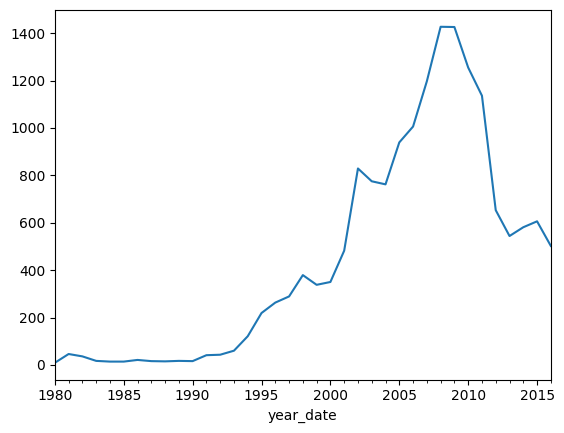

In [18]:
games.groupby("year_date")["name"].count().plot(kind="line")

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

Podemos observar que si revisamos la cantidad de juegos, tanto PS2, DS, PS3, Wii, X360 son las plataformas que cuentan con la mayor cantidad de títulos disponibles, sin embargo, cuando filtramos por ventas totales observamos un cambio en el orden, doned si bien PS2 se mantiene como la plataforma con mas ventas, ahora x360 se ubica como la segunda mas relevante, seguido por PS3, Wii y DS.

Resulta interesante hacer notar que todas las plataformas anteriormente mencionadas parecen encontrarse al final de su ciclo de vida, siendo interesante considerar las consolas "sucesoras" para análisis posteriores.   

In [19]:
print(games["platform"].unique())
games["platform"].value_counts().head()

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64

In [20]:
games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

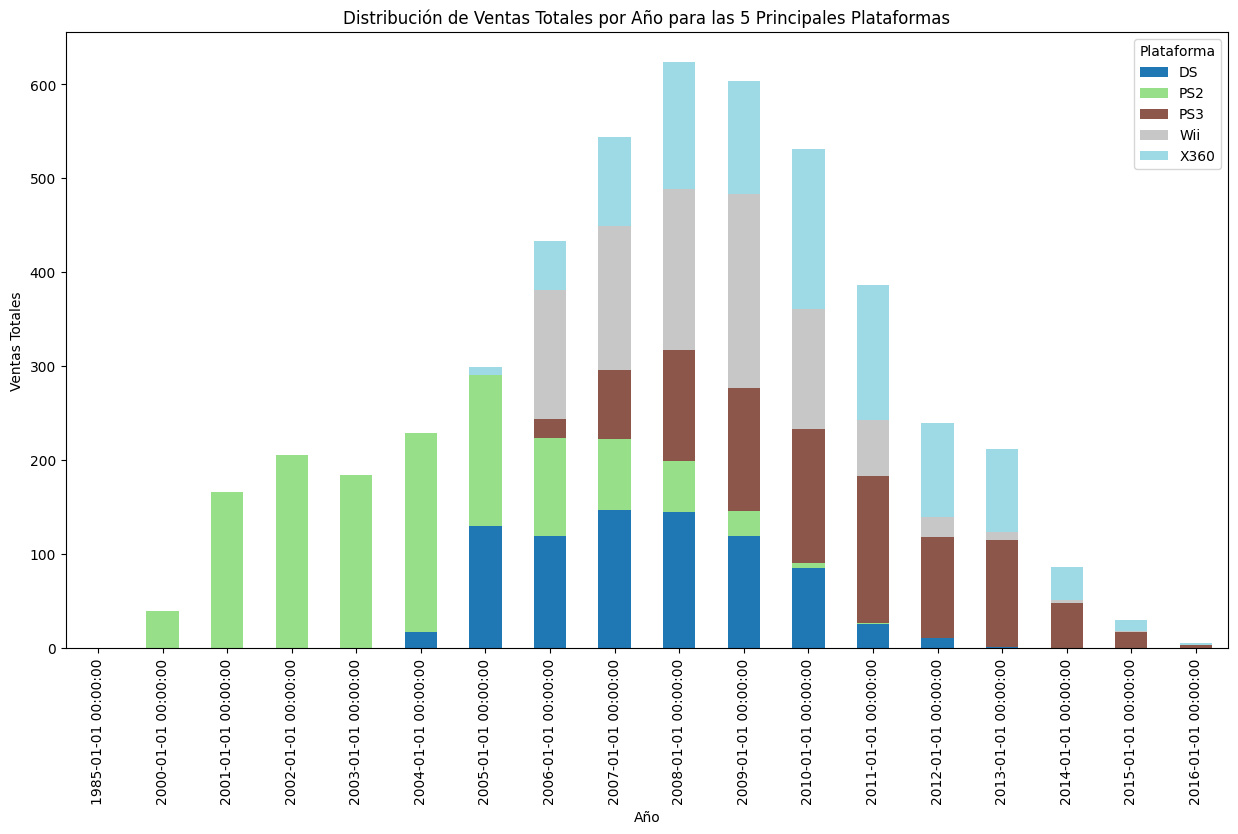

In [21]:
top_5_platforms = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head().index

filtered_games = games[games["platform"].isin(top_5_platforms)]

grouped_data = filtered_games.groupby(['platform', 'year_date'])['total_sales'].sum().unstack()

grouped_data.T.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')

plt.title("Distribución de Ventas Totales por Año para las 5 Principales Plataformas")
plt.xlabel("Año")
plt.ylabel("Ventas Totales")
plt.legend(title="Plataforma")
plt.show()



### Plataformas que solian ser populares pero ya no lo son.

Podemos observar que todas las plataformas contenidas en el top 10 de mayores ventas terminaron o estan terminando su ciclo de vida, motivo por el cual podemos considerar a PS, PS2, Wii, y X360 como los casos mas emblemáticos de plataformas que solian ser populares pero ya no lo son. 

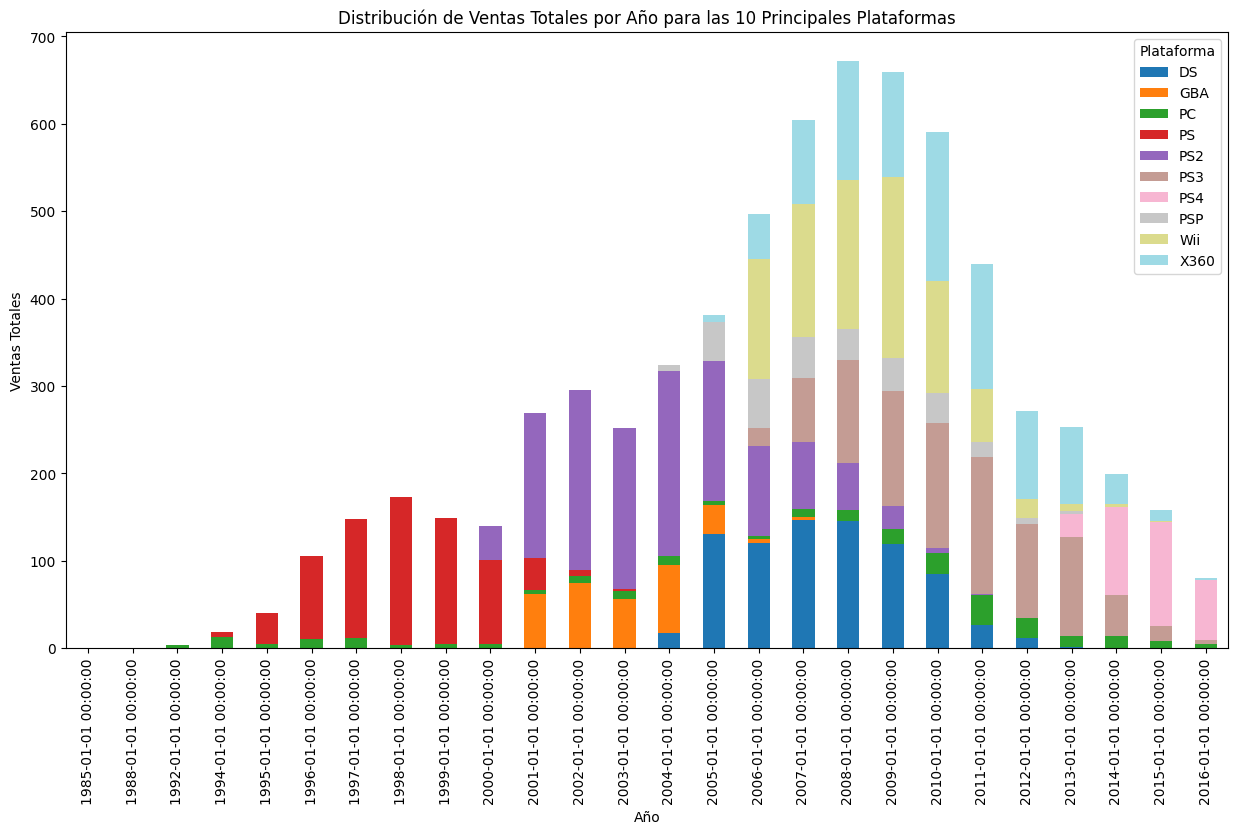

In [22]:
top_10_platforms = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(10).index

filtered_games = games[games["platform"].isin(top_10_platforms)]

grouped_data = filtered_games.groupby(['platform', 'year_date'])['total_sales'].sum().unstack()

grouped_data.T.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')

plt.title("Distribución de Ventas Totales por Año para las 10 Principales Plataformas")
plt.xlabel("Año")
plt.ylabel("Ventas Totales")
plt.legend(title="Plataforma")
plt.show()

### Ciclo de vida de las plataformas. 

Podemos observar que existieron plataformas que no duraron ni siquiera un año en el mercado (GG, PCXS y TG16), mientras que existen otras extremadamente longevas como el caso de la PC con 31 años, siendo el promedio de ciclo de vida 7.6 años. 

Considerando lo anterior y observando su año de primera venta podemos considerar que existen 4 plataformas cuyo ciclo de vida se encuentra plenamente vigente siendo estas:

* PS4 con apenas 3 años en el mercado.
* WiiU con 4 años en el mercado.
* XOne con 3 años en el mercado. 
* PC que escapa de estos ciclos,sosteniendo su presencia desde el principio de los datos presentes en el análisis.

En este punto vale la pena hacer una aclaración que resulta de gran valor para interpretar los datos en función de los años que se puedan consideren relevantes.

Todas las industrias pasan por diferentes etapas, la etapa emergente o si consideramos el producto de introducción que en nuestros datos podrían considerarse desde 1980 a 1993 aproximadamente, una fase de crecimiento que puede ir de 1993 al 2010 y una fase de madurez o estabilidad que considera desde aproximadamente el 2011 al 2016 que es donde podemos asumir que se encuentra la industria, a pesar de lo cual recomendaría conocer mejor el ecosistema de negocios y especialmente los "productos sustitutos" y el estado de "R&D" para evaluar la capacidad predictiva de este periodo. 

Debido a lo anterior el rango de años que podemos considerar esta del 2011 al 2016, sin embargo no dejare de lado los años anteriores, ya que resulta interesante analizar a PC como la unica plataforma que ha estado presente desde el principio. 

Se considera adicionalmente un analisis de la generación anterior de las consolas consideradas como potenciales para observar su comportamiento y una posible ruta que puede seguir la nueva generación de plataformas. 


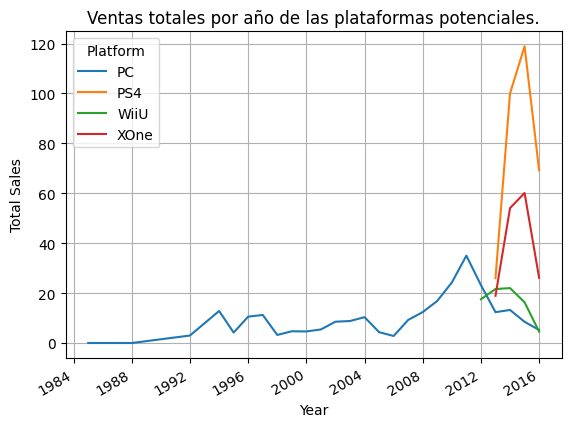

In [23]:
filtered_games = games[games['platform'].isin(["XOne", "WiiU", "PS4", "PC"])]

pivot_table = filtered_games.pivot_table(index="year_date", columns="platform", values="total_sales", aggfunc="sum")

pivot_table.plot(kind="line")

plt.title('Ventas totales por año de las plataformas potenciales.')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

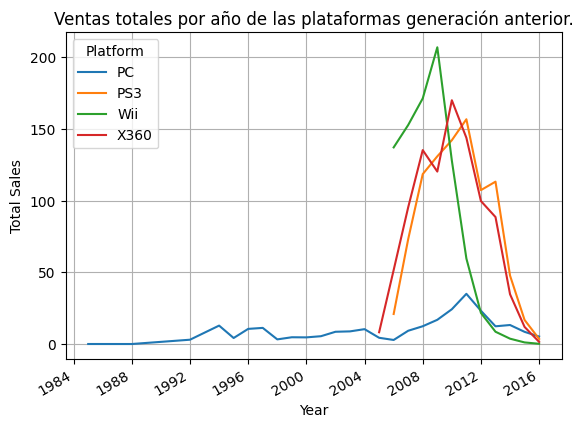

In [24]:
filtered_games = games[games['platform'].isin(["X360", "Wii", "PS3", "PC"])]

pivot_table = filtered_games.pivot_table(index="year_date", columns="platform", values="total_sales", aggfunc="sum")

pivot_table.plot(kind="line")

plt.title('Ventas totales por año de las plataformas generación anterior.')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

In [25]:
primera_venta = games.groupby('platform')['year_date'].min().reset_index()
ultima_venta = games.groupby('platform')['year_date'].max().reset_index()

tiempo_vida = pd.merge(primera_venta, ultima_venta, on='platform')
tiempo_vida.columns = ['platform', 'primera_venta', 'ultima_venta']

tiempo_vida['duracion'] = tiempo_vida['ultima_venta'].dt.year - tiempo_vida['primera_venta'].dt.year

print("Duración de vida de cada plataforma (en años):")
print(tiempo_vida)

duracion_media = tiempo_vida['duracion'].mean()

print()

print(duracion_media)

Duración de vida de cada plataforma (en años):
   platform primera_venta ultima_venta  duracion
0      2600    1980-01-01   1989-01-01         9
1       3DO    1994-01-01   1995-01-01         1
2       3DS    2011-01-01   2016-01-01         5
3        DC    1998-01-01   2008-01-01        10
4        DS    1985-01-01   2013-01-01        28
5        GB    1988-01-01   2001-01-01        13
6       GBA    2000-01-01   2007-01-01         7
7        GC    2001-01-01   2007-01-01         6
8       GEN    1990-01-01   1994-01-01         4
9        GG    1992-01-01   1992-01-01         0
10      N64    1996-01-01   2002-01-01         6
11      NES    1983-01-01   1994-01-01        11
12       NG    1993-01-01   1996-01-01         3
13       PC    1985-01-01   2016-01-01        31
14     PCFX    1996-01-01   1996-01-01         0
15       PS    1994-01-01   2003-01-01         9
16      PS2    2000-01-01   2011-01-01        11
17      PS3    2006-01-01   2016-01-01        10
18      PS4    2013-01

### Plataformas potencialmente rentables. 

#### Para poder responder esta pregunta se solicita conocer:
* Plataformas líderes en ventas: 

Cuando observamos las plataformas con mayor número de ventas podemos observar que en el top 5 encontramos plataformas de generaciones pasadas que ya cumplieron su ciclo de vida, así como plataformas portátiles. en el top 10 encontramos a dos plataformas potenciales como PS4 y PC, y debemos ir al top20 para encontrar al XOne y WiiU.  

* Conocer su comportamiento: cuales crecen en ventas y cuales se reducen:

Considerando lo anterior, así como la aclaración respecto a que los datos de 2016 pueden estar incompletos y observando la gráfica "Ventas totales por año de las plataformas potenciales", podemos observar que la mayoría de las plataformas con mayores ventas ya terminaron su ciclo de vida y la última generación puede estar comenzando su declive (con alta probabilidad no tan marcado como aparece en esta gráfica) en espera de una siguiente generación. 

In [26]:
games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(20)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
Name: total_sales, dtype: float64

### Ventas globales de juegos por plataforma. 

Para revisar las ventas globales de juegos por plataforma se realizan 2 boxplots, uno con las principales plataformas de ventas que no considera su ciclo de vida, y otra con las plataformas que son potenciales actualmente. 

Podemos observar que si bien en el boxplot general PS4 no tiene una posición favorecida, cuando acotamos a las plataformas actuales es sin duda la que mayor cantidad de ventas tiene, seguido de XBox One. 

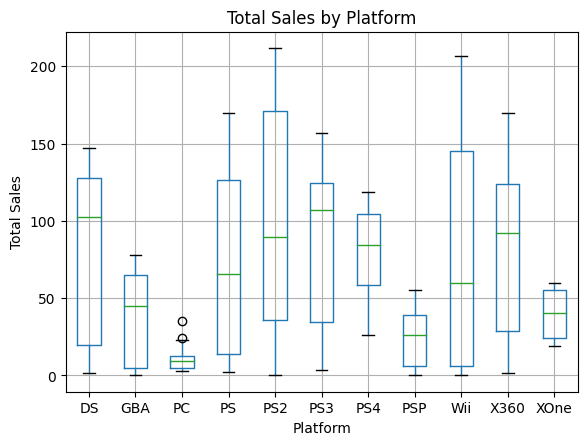

In [27]:
filtered_games = games.query("year_date > '1993-01-01'")

filtered_games = filtered_games[filtered_games['platform'].isin(["PS","PS2","PS3","PS4","PSP", "Wii","Wii", "DS", "GBA", "X360", "XOne", "PC"])]

sales_by_year = filtered_games.groupby(["year_date", "platform"])["total_sales"].sum().reset_index()


sales_by_year.boxplot(column="total_sales", by="platform")
plt.title('Total Sales by Platform')
plt.suptitle('') 
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

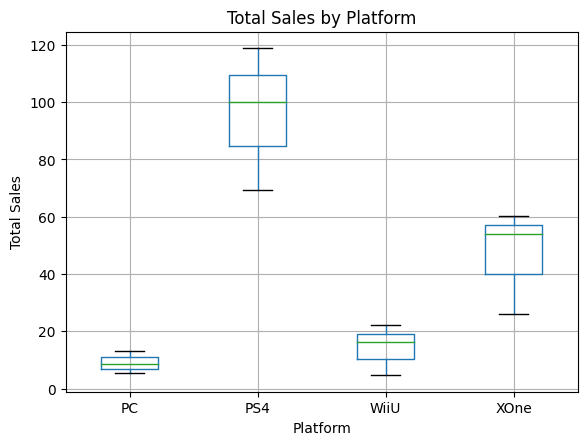

In [28]:
filtered_games = games.query("year_date > '2013-01-01'")

filtered_games = filtered_games[filtered_games['platform'].isin(["XOne", "WiiU", "PS4", "PC"])]

sales_by_year = filtered_games.groupby(["year_date", "platform"])["total_sales"].sum().reset_index()


sales_by_year.boxplot(column="total_sales", by="platform")
plt.title('Total Sales by Platform')
plt.suptitle('') 
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

### Correlación entre reseñas y ventas. 

Se usa la plataforma PS4 por su potencial para ser rentable y se realiza un gráfico de dispersión, tanto para observar como se correlacionan sus ventas con el score de los críticos como con el de los usuarios, además de calcular la correlación.

Los resultados arrojan que existe una correlación debil con el score de los críticos, pero no existe una correlación entre las ventas y el score que asignan los usuarios. 

De cualquier manera en ambos casos seria deseable contar con valores mas precisos en las columnas user_score y critic_score, ya que aunque se solucionaron los problemas iniciales, estas soluciones no dejan de presentar sesgos importantes. 

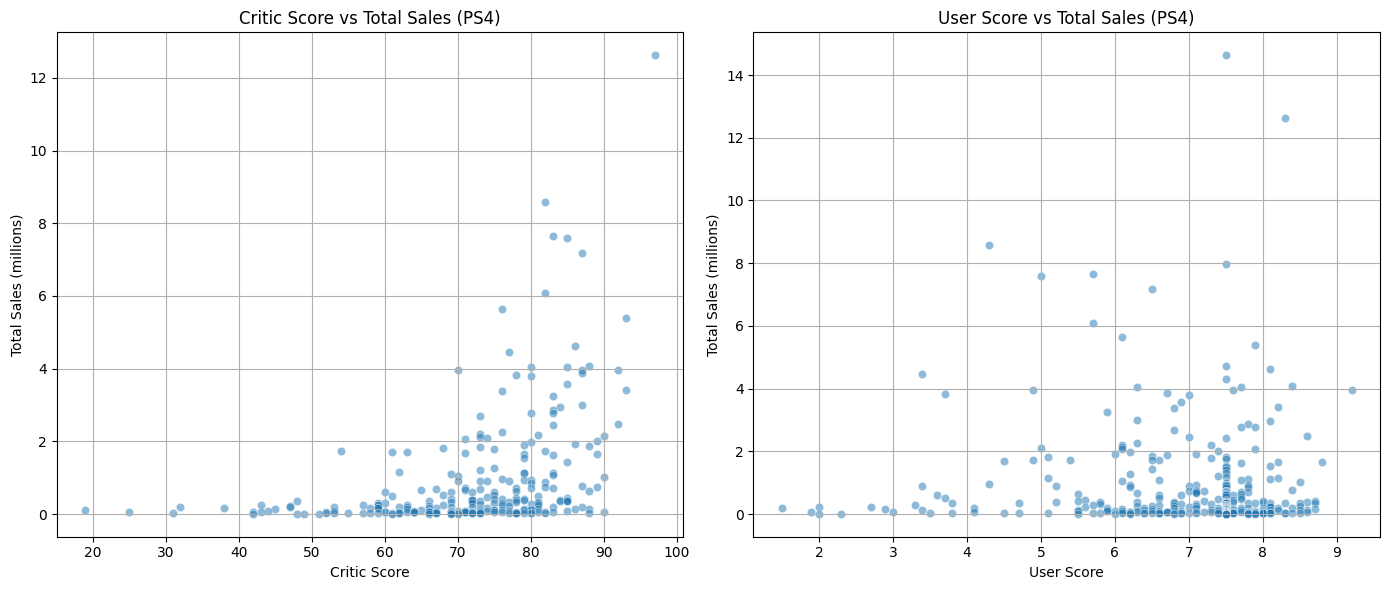

Correlación entre Critic Score y Total Sales (PS4): 0.40656790206178095
Correlación entre User Score y Total Sales (PS4): -0.06275557891282788


In [46]:
ps4_games = games[games['platform'] == 'PS4']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', alpha=0.5)
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_games, x='user_score_median', y='total_sales', alpha=0.5)
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)

plt.tight_layout()
plt.show()


correlation_critic = ps4_games['critic_score'].corr(ps4_games['total_sales'])
correlation_user = ps4_games['user_score_median'].corr(ps4_games['total_sales'])

print(f"Correlación entre Critic Score y Total Sales (PS4): {correlation_critic:}")
print(f"Correlación entre User Score y Total Sales (PS4): {correlation_user:}")

### Comparativa de Juegos en diversas plataformas. 

Podemos observar que en 7 de los 10 casos en los que comparamos juegos que tienen versiones para diferentes plataformas, PS4 tiene la mayor cantidad de ventas, 

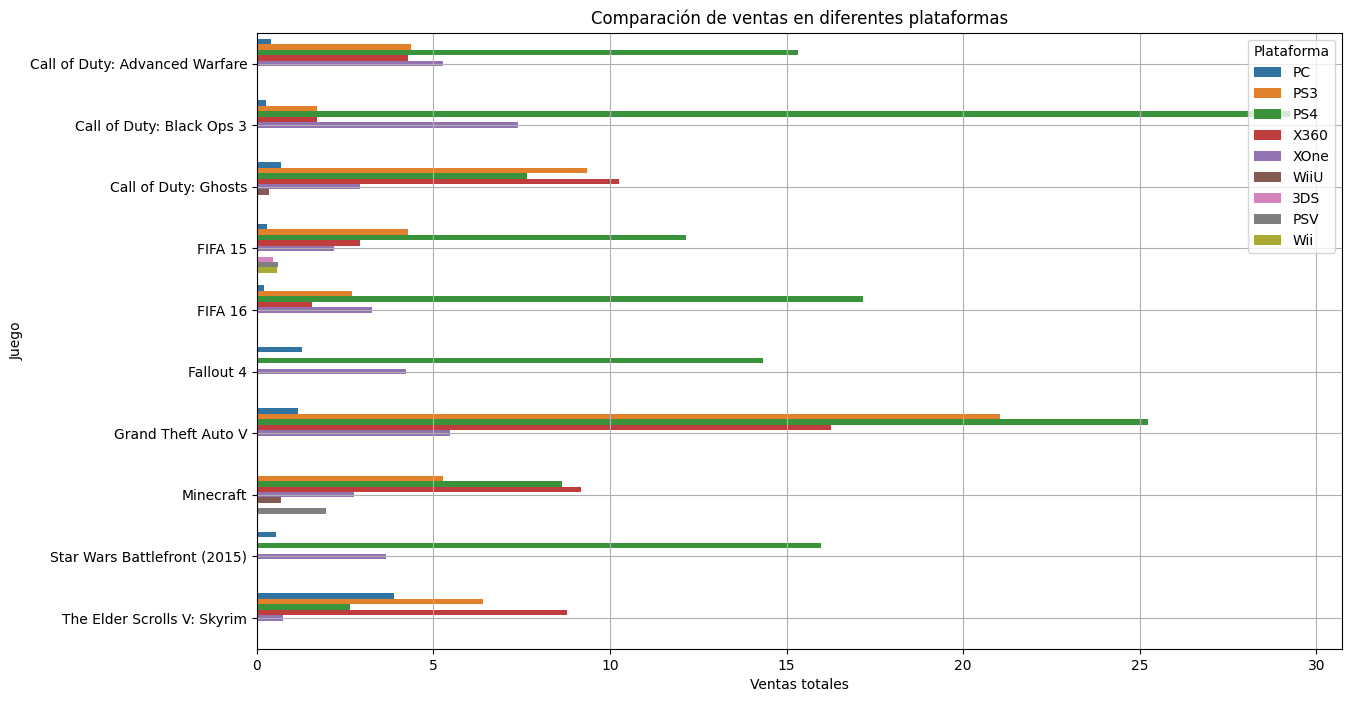

In [45]:
ps4_games_names = ps4_games['name'].unique()

other_platforms_games = games[games['name'].isin(ps4_games_names) & (games['platform'] != 'ps4')]

combined_data = pd.concat([ps4_games, other_platforms_games])

ventas_por_juego_y_plataforma = combined_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

top_10_games = ventas_por_juego_y_plataforma.groupby('name')['total_sales'].sum().nlargest(10).index
top_10_data = ventas_por_juego_y_plataforma[ventas_por_juego_y_plataforma['name'].isin(top_10_games)]

plt.figure(figsize=(14, 8))
sns.barplot(x='total_sales', y='name', hue='platform', data=top_10_data, dodge=True)
plt.title('Comparación de ventas en diferentes plataformas')
plt.xlabel('Ventas totales')
plt.ylabel('Juego')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

### Géneros más rentables. 

Los géneros mas rentables parecen ser: Plataform, Shooter, Sports y Figthing.  

In [30]:
percentiles = np.linspace(0, 1, 11).tolist() + [0.95, 0.99]

sales_description = games["total_sales"].describe(percentiles=percentiles)

print(sales_description)


count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
0%           0.000000
10%          0.020000
20%          0.050000
30%          0.080000
40%          0.110000
50%          0.170000
60%          0.250000
70%          0.380000
80%          0.600000
90%          1.206000
95%          2.040000
99%          5.467200
100%        82.540000
max         82.540000
Name: total_sales, dtype: float64


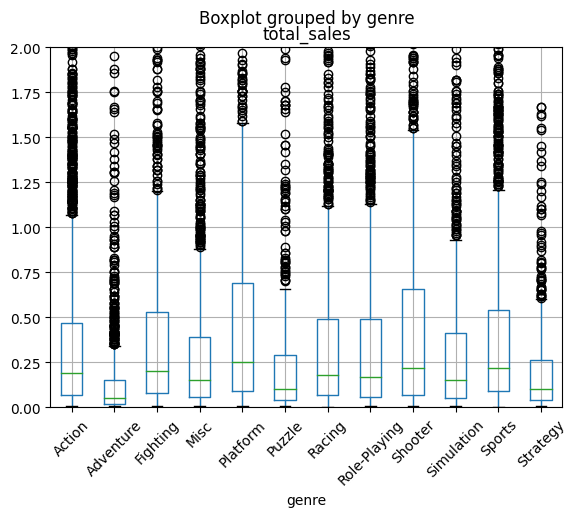

In [50]:
games_wo = games.query("total_sales < 5.467200")

games_wo.boxplot(
    column="total_sales",
    by="genre",
)
plt.ylim(0, 2)
plt.xticks(rotation=45)
plt.show()

## Perfil de Usuarios por Región.

### Perfiles de usuarios por región en base a las plataformas, géneros y ratings más populares. 

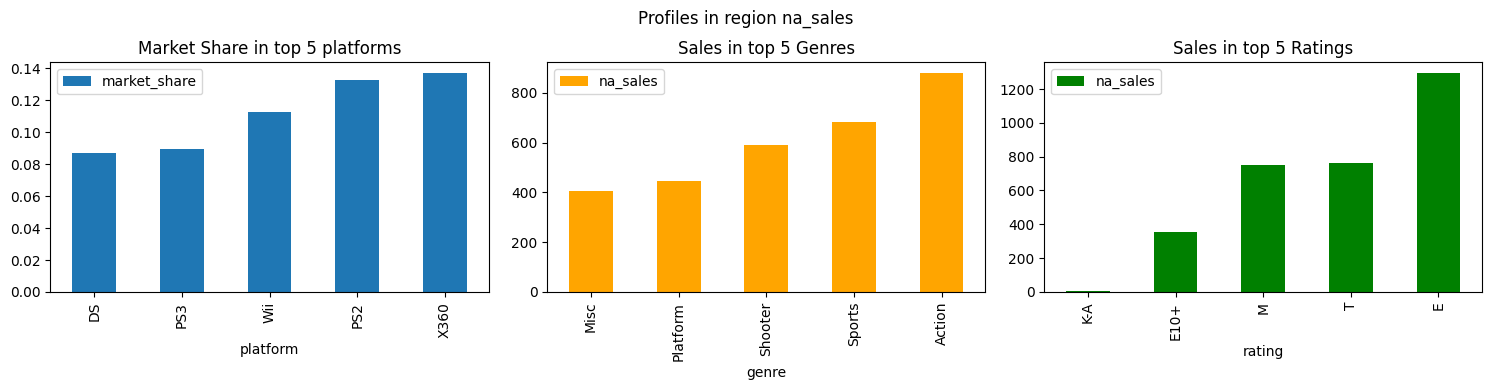

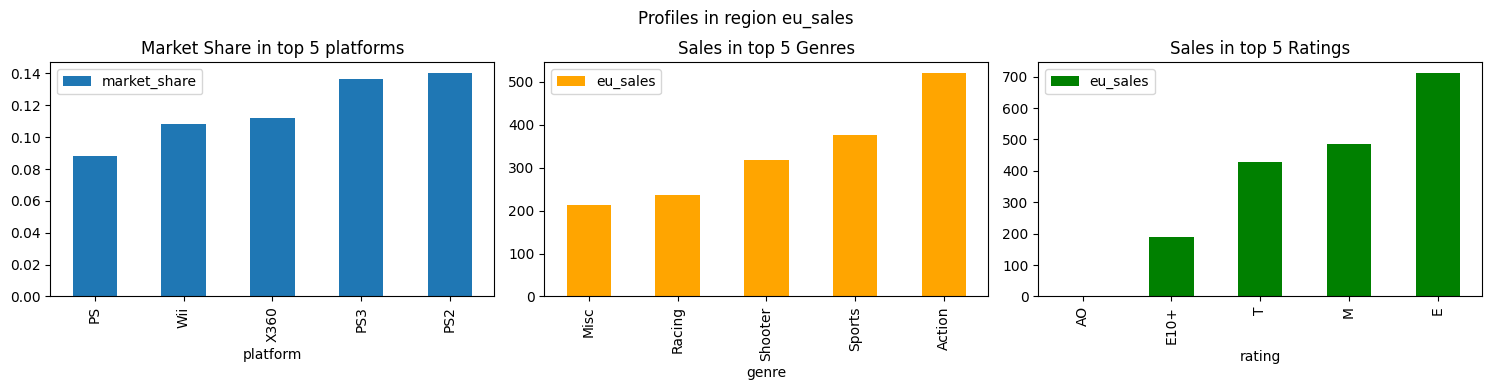

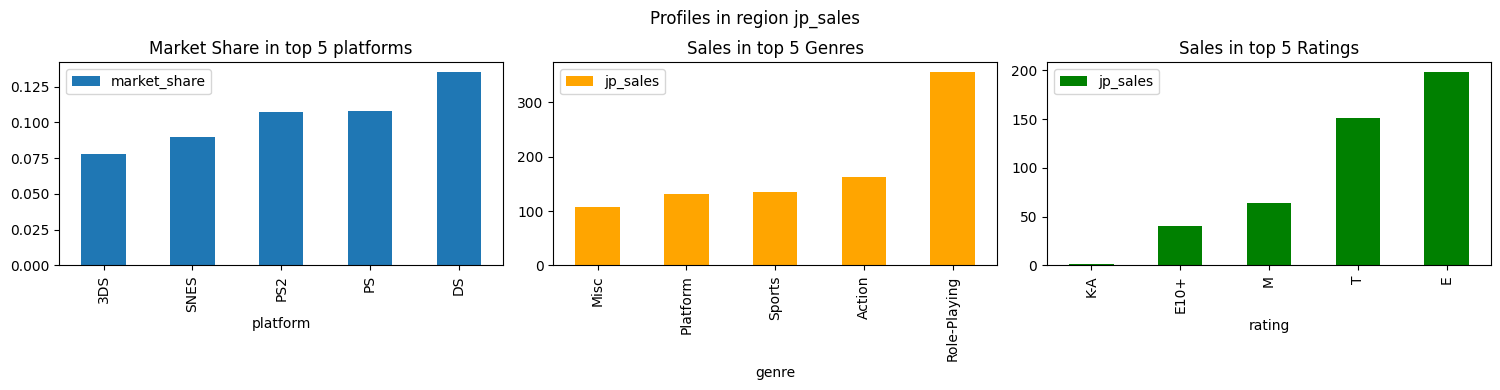

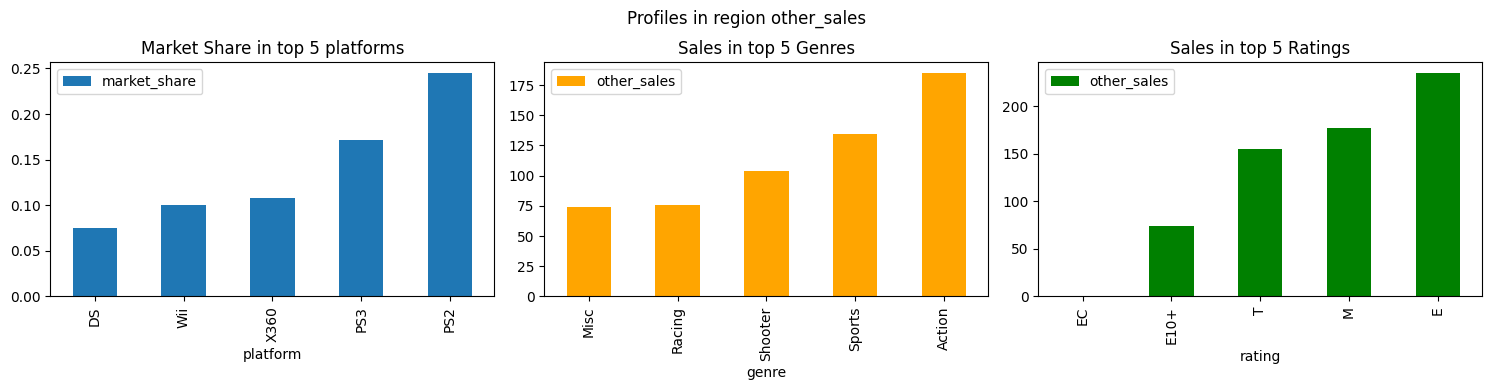

In [32]:
for region in ["na_sales", "eu_sales", "jp_sales", "other_sales"]:

    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 4))

    sales_by_platform = games.groupby("platform")[region].sum()
    top_5_patforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_5_patforms["market_share"] = top_5_patforms[region] / sales_by_platform.sum()
    
    top_5_genres = games.groupby("genre")[region].sum().sort_values().tail(5).reset_index()
    
    top_5_ratings= games.groupby("rating")[region].sum().sort_values().tail(5).reset_index()

    fig.suptitle(f"Profiles in region {region}", y=0.96)

    axes[0].set_title("Market Share in top 5 platforms")
    top_5_patforms.plot(kind="bar", x="platform", y="market_share", ax=axes[0])

    axes[1].set_title("Sales in top 5 Genres")
    top_5_genres.plot(kind="bar", x="genre", y=region, ax=axes[1], color="orange")
    
    axes[2].set_title("Sales in top 5 Ratings")
    top_5_ratings.plot(kind="bar", x= "rating", y= region, ax=axes[2], color="green")
    
    fig.tight_layout(pad=1)



### Conclusiones de los perfiles por región.

* Respecto a la región de Norte América

Al considerar las ventas totales y su cuota de mercado (market share) podemos observar que hay dos plataformas de Sony, lo que nos permite inferir una preferencia para las consolas de sony y por lo tanto para PS4 como la plataforma que puede tener el mayor "market share" en la última generación. 

Respecto al género, es muy claro que aquellos videojuegos de acción tienen preferencia sobre los demás, teniendo en segundo lugar a los juegos de deportes. 

Respecto al rating, la clasificación de mayor venta fue E (Everyone) tiene una mayor preferencia.

* Respecto a la región de Europa.

De nuevo se observa una preferencia por las consolas de Sony (PS, PS2 y PS3 aparecen en el top 5) por lo que podemos inferir que PS4 será la plataforma de mayor cuota de mercado de la nueva generación. 

Respecto al género, de nuevo los videojuegos de acción tienen preferecia sobre los demas, y de igual manera el segundo lugar lo obtienene los juegos de deportes. 

El rating E (Everyone) tiene la mayor preferencia en este mercado. 

* Respecto a la región Japón.

Es interesante observar que dos consolas portátiles de nintendo se encuentran en el top 5 (SNES, DS y 3DS)

El género dominante es el de los juegos de rol

Mientras que el rating E (Everyone) se mantiene como el dominante también en esta región.

* Respecto a la región "Otros paises"

Las plataformas más populares son 2 de Sony (PS2 y PS3) 

El género de acción es el más popular, seguido por los deportes.

La clasificación mas popular, al igual que en el resto de regiones es E (Everyone)


#### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

En todas las regiones excepto Japón parece existir una preferencia por las consolas de Sony, seguido por la consola de Microsoft X360.

En Japón se observa no solo un cambio en la preferencia hacia las plataformas de Nintendo, pero también por aquellas definidas como portátiles (3DS y DS)

#### Los cinco géneros principales. Explica la diferencia.

Los generos de acción y deportes se mantienen en el primer y segundo lugar de preferencias respectivamente en todas las regiones excepto en Japón, donde ocupan el segundo y tercer lugar, dejando el primer lugar para los juegos de rol. 

#### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Las clasificaciones se mantienen estables con una alta coincidencia entre las regiones, siendo la clasificacion E la dominante en todas las regiones, seguidas por M, T y E10+.

No parece existir una afectación en las ventas por las clasificaciones en ninguna región, pareciera mas una tendencia global. 

## Pruebas de Hipótesis. 

### Calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

In [33]:
from scipy.stats import levene

XOne_User_Score = games[games["platform"] == "XOne"]["user_score_median"].dropna()
PC_User_Score = games[games["platform"] == "PC"]["user_score_median"].dropna()

# Realizar la prueba de Levene
statistic, p_value = levene(XOne_User_Score, PC_User_Score)

# Mostrar el valor p
print("Valor p:", p_value)
alpha=0.05 




Valor p: 0.9929649852182456


In [34]:
from scipy.stats import ttest_ind

XOne_User_Score = games[games["platform"] == "XOne"]["user_score_median"].dropna()
PC_User_Score = games[games["platform"] == "PC"]["user_score_median"].dropna()

statistic, p_value = ttest_ind(
    XOne_User_Score,
    PC_User_Score,
    equal_var=True
)

statistic, p_value

print("Valor p:", p_value)
alpha=0.05 



Valor p: 0.00010123955107193582


#### Para desarrollar la prueba de hipótesis que nos permita saber si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas usamos una prueba de Levene para conocer si las varianzas muestran diferencia estadística y una prueba de T test o T de Student usando un valor alpha de 0.05 y formulando las hipótesis de la siguiente manera:

* Hipótesis Nula: El promedio de las calificaciones de los usuarios en las plataformas Xbox One y PC No tienen una diferente significativa. 

* Hipótesis Alternativa: El promedio de las calificaciones de los usuarios en las plataformas Xbox One y PC tienen una diferente significativa. 

#### Los resultados son los siguientes:

* La prueba de levene arrojo un resultado de 0.99 lo cual nos permite concluir que no hay evidencia para negar que las varianzas sean diferentes, lo cual nos permite definir este valor para la prueba de ttest_ind.

* La prueba T Test arrojo un valor p=0.0001 lo cual nos permite concluir que se rechaza la hipótesis nula y se acepta la hipótesis alternativa, definiendo con esto que existe evidencia de una diferencia estadística entre las calificaciones promedio de Xbox One y PC. 

### Calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [35]:
from scipy.stats import levene

Action_User_Score = games[games["genre"] == "Action"]["user_score_median"].dropna()
Sports_User_Score = games[games["genre"] == "Sports"]["user_score_median"].dropna()

# Realizar la prueba de Levene
statistic, p_value = levene(Action_User_Score, Sports_User_Score)

# Mostrar el valor p
print("Valor p:", p_value)
alpha=0.05 

Valor p: 0.6828105166182066


In [36]:
from scipy.stats import ttest_ind

Action_User_Score = games[games["genre"] == "Action"]["user_score_median"].dropna()
Sports_User_Score = games[games["genre"] == "Sports"]["user_score_median"].dropna()

statistic, p_value = ttest_ind(
    Action_User_Score,
    Sports_User_Score,
    equal_var=True
)

statistic, p_value

print("Valor p:", p_value)
alpha=0.05 

Valor p: 0.7131417795320426


#### Para desarrollar la prueba de hipótesis que nos permita saber si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas usamos una prueba de Levene para conocer si las varianzas muestran diferencia estadística y una prueba de  T test o T de Student usando un valor alpha de 0.05 y formulando las hipótesis de la siguiente manera:

* Hipótesis Nula: El promedio de las calificaciones de los usuarios en los géneros de acción y deportes No tienen una diferente significativa. 

* Hipótesis Alternativa: El promedio de las calificaciones de los usuarios en los géneros de acción y deportes tienen una diferente significativa. 

#### Los resultados son los siguientes:

* La prueba de levene arrojo un resultado de 0.68 lo cual nos permite concluir que no hay evidencia para negar que las varianzas sean diferentes, lo cual nos permite definir este valor para la prueba de ttest_ind.

* La prueba T Test arrojo un valor p=0.7131 lo cual nos permite concluir que se acepta la hipótesis nula, definiendo con esto que No existe evidencia de una diferencia estadística entre las calificaciones promedio de los géneros Action y Sports. 

## Conclusiones Generales.

### Respecto a la información general del DF.

Llama mucho la atención la cantidad de valores nulos en diferentes columnas y la aparición de los valores TBD, los 
cuales fueron convertidos a NaN y posteriomente rellenados con la mediana para poder hacer los cálculos necesarios.

Entiendo que debemos buscar soluciones ante estas eventualidades, e incluso complementar con otros DF que encontremos 
sin embargo, me hace pensar respecto a la necesidad de prevenir estas situaciones para desarrollar un análisis más
preciso. 

### Respecto a la prepación de los datos.

Con el fin de no modificar de forma irreversible la información provista, se crearon 3 nuevas columas para el DF
que permitan mantener la información original y modificar esta para facilitar los análisis posteriores. 


### Respecto al Análsis de los datos.

Resulta interesante tener un volumen de datos tan amplio, ya que permite evaluar la industria desde una perspectiva que general que facilita un análisis estratégico de mayor calidad. 

Por otro lado creo que los datos incompletos del año 2016 y el ciclo de vida de las plataformas de ultima generación hacen que tengamos que revisar los comportamientos previos para observar tendencias que faciliten el análisis.

### Respecto al Perfil de Usuarios por Región.

Llamo mi atención que exista un dominio tan evidente de los generos de acción y deportes, así como de la clasificación E en los videojuegos, lo cual permite cierta capacidad predictiva respecto al tipo de juego y clasificación que será un exito en ventas, respecto a la plataforma no es ninguna sopresa encontrar a Sony, Microsoft y Nintendo, pero si me pareció relevante que en Japón existan dos plataformas móviles en el top 5. 

### Respecto a las Pruebas de Hipótesis. 

En ambos casos, previo a la prueba ttest_ind se realizo la prueba de levene para poder conocer si existian diferencias estadísticas entre las varianzas, permitiendo con esto realizar la prueba para revisar las medias de los grupos de una manera más precisa. 
